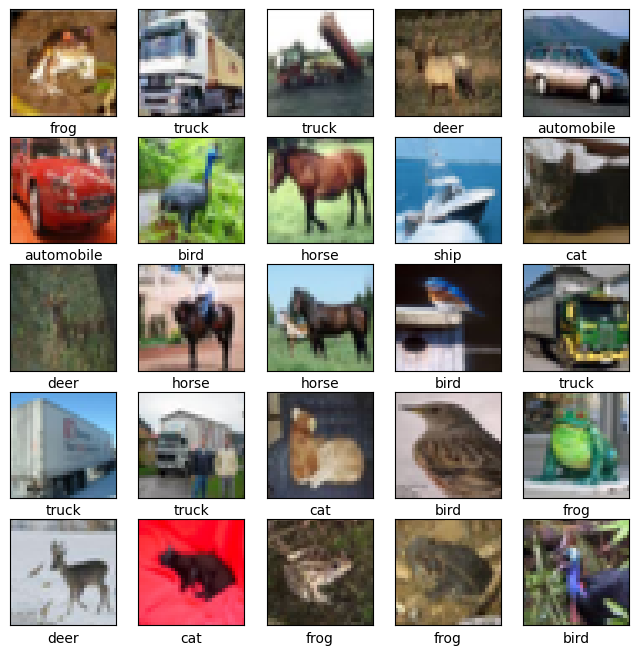

Class counts: Counter({np.uint8(6): 6000, np.uint8(9): 6000, np.uint8(4): 6000, np.uint8(1): 6000, np.uint8(2): 6000, np.uint8(7): 6000, np.uint8(8): 6000, np.uint8(3): 6000, np.uint8(5): 6000, np.uint8(0): 6000})
The CIFAR-10 dataset is balanced.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Name Classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the Dataset
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


all_labels = tf.concat([y_train, y_test], axis=0).numpy().flatten()
class_counts = Counter(all_labels)
is_balanced = len(set(class_counts.values())) == 1
print("Class counts:", class_counts)
if is_balanced:
    print("The CIFAR-10 dataset is balanced.")
else:
    print("The CIFAR-10 dataset is NOT balanced.")


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Reshape and Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32) 


**Run this only if you want to apply LAB Color Space Transformation**

In [4]:
import cv2

def rgb_to_lab(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB).astype(np.float32)
    l, a, b = cv2.split(lab_image)
    l = l / 100.0
    a = (a + 128) / 255.0
    b = (b + 128) / 255.0
    return np.stack([l, a, b], axis=-1)

def preprocess_dataset(data):
    return np.array([rgb_to_lab(img) for img in data])

x_train = preprocess_dataset(x_train)
x_test = preprocess_dataset(x_test)

**CNN**

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

CNN = models.Sequential()
CNN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Flatten())
CNN.add(layers.Dense(1024, activation='relu')) #htan 512 giati 0xi 256 ;h 1024
CNN.add(layers.Dropout(0.5))

CNN.add(layers.Dense(10, activation='softmax'))


# Compile the model
CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

def learning_rate_scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))
lr_scheduler = LearningRateScheduler(learning_rate_scheduler)


start_time = time.time()

history = CNN.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_data=(x_test, y_test), callbacks=lr_scheduler)
end_time = time.time()


# Evaluate the model
test_loss, test_acc = CNN.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.2975 - loss: 1.9104 - val_accuracy: 0.5124 - val_loss: 1.3663 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4932 - loss: 1.4054 - val_accuracy: 0.5806 - val_loss: 1.1849 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5572 - loss: 1.2470 - val_accuracy: 0.6209 - val_loss: 1.0746 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5945 - loss: 1.1358 - val_accuracy: 0.6479 - val_loss: 1.0219 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6210 - loss: 1.0710 - val_accuracy: 0.6656 - val_loss: 0.9466 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6482 - loss: 0.9997 - val_accuracy: 0.6944 - val_loss: 0.8864 - learning_rate: 9.0484e-04
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6654

**Plot Learning Curve**

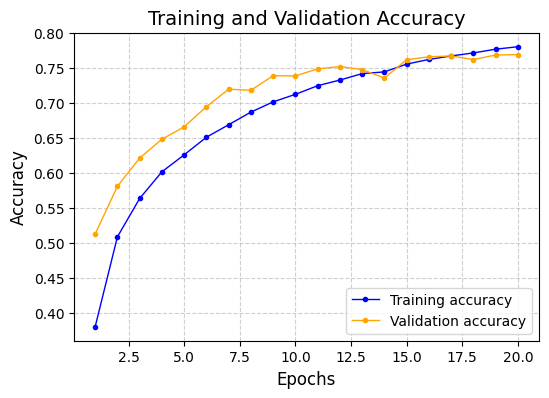

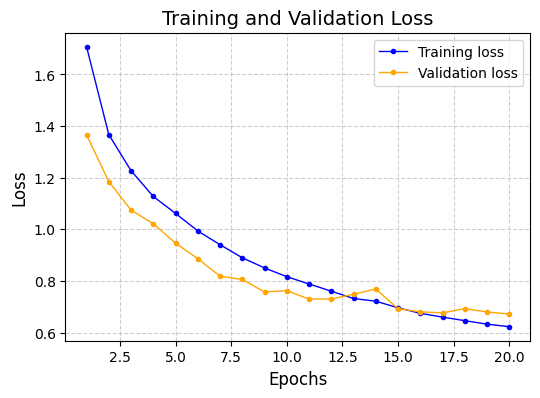

In [6]:
import matplotlib.pyplot as plt

def plot_learning_curve(history, metric='accuracy'):
    # Extract data from history
    train_metric = history.history[metric]
    val_metric = history.history[f'val_{metric}']
    epochs = range(1, len(train_metric) + 1)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, train_metric, color='blue', linestyle='-', marker='.', linewidth=1, label=f'Training {metric}')
    plt.plot(epochs, val_metric, color='orange', linestyle='-', marker='.', linewidth=1, label=f'Validation {metric}')
    plt.title(f'Training and Validation {metric.title()}', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel(metric.title(), fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Plot both accuracy and loss
plot_learning_curve(history, metric='accuracy')  # Plot accuracy curve
plot_learning_curve(history, metric='loss')     # Plot loss curve


**Print Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


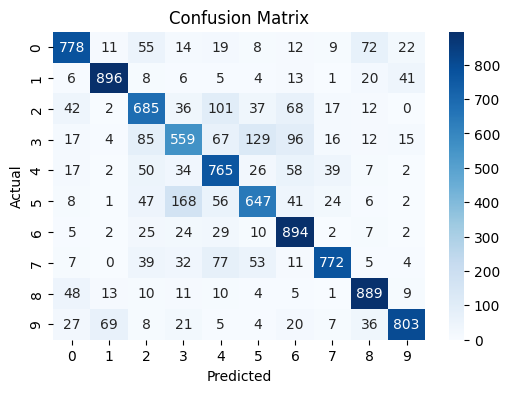


Classification Success Rate per Class:
Class 0: 77.80%
Class 1: 89.60%
Class 2: 68.50%
Class 3: 55.90%
Class 4: 76.50%
Class 5: 64.70%
Class 6: 89.40%
Class 7: 77.20%
Class 8: 88.90%
Class 9: 80.30%


In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = CNN.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_totals = cm.sum(axis=1)
class_correct = np.diag(cm)
class_accuracy = class_correct / class_totals * 100
print("\nClassification Success Rate per Class:")
for i, accuracy in enumerate(class_accuracy):
    print(f"Class {i}: {accuracy:.2f}%")
